In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Осмотр данных
data = pd.read_csv("used_cars_data.csv")

print("Размер данных:", data.shape)
print("\nПервые 5 записей:")
print(data.head())
print("\nПоследние 5 записей:")
print(data.tail())
print("\nИнформация о данных:")
print(data.info())

Размер данных: (7253, 14)

Первые 5 записей:
   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp   

In [ ]:
# Анализ вида данных
print("Уникальные значения по столбцам:")
print(data.nunique())

print("\nПропущенные значения:")
print(data.isnull().sum())

print("\nПроцент пропущенных значений:")
missing_percent = (data.isnull().sum()/(len(data)))*100
print(missing_percent)

Уникальные значения по столбцам:
S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Пропущенные значения:
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Процент пропущенных значений:
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel

In [9]:
data = data.drop(['S.No.'], axis=1)
print("Данные после удаления столбца S.No.:")
print(data.info())

# Создаем новые признаки
from datetime import date
data['Car_Age'] = date.today().year - data['Year']

# Разделяем название на марку и модель
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

# Исправляем некорректные названия марок
data["Brand"].replace({
    "ISUZU": "Isuzu", 
    "Mini": "Mini Cooper",
    "Land": "Land Rover"
}, inplace=True)

Данные после удаления столбца S.No.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB
None


In [ ]:
# Статистический анализ
print("Сводная статистика числовых переменных:")
print(data.describe().T)

print("\nСводная статистика всех переменных:")
print(data.describe(include='all').T)

# Разделяем переменные на типы для анализа
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print(f"\nКатегориальные переменные ({len(cat_cols)}): {list(cat_cols)}")
print(f"Числовые переменные ({len(num_cols)}): {num_cols}")

Сводная статистика числовых переменных:
                    count          mean           std      min      25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Seats              7200.0      5.279722      0.811660     0.00      5.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   
Car_Age            7253.0     11.634634      3.254421     6.00      9.0   

                        50%       75%        max  
Year                2014.00   2016.00     2019.0  
Kilometers_Driven  53416.00  73000.00  6500000.0  
Seats                  5.00      5.00       10.0  
Price                  5.64      9.95      160.0  
Car_Age               11.00     14.00       29.0  

Сводная статистика всех переменных:
                    count unique                     top  freq          mean  \
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Locati


Year:
Асимметрия: -0.84


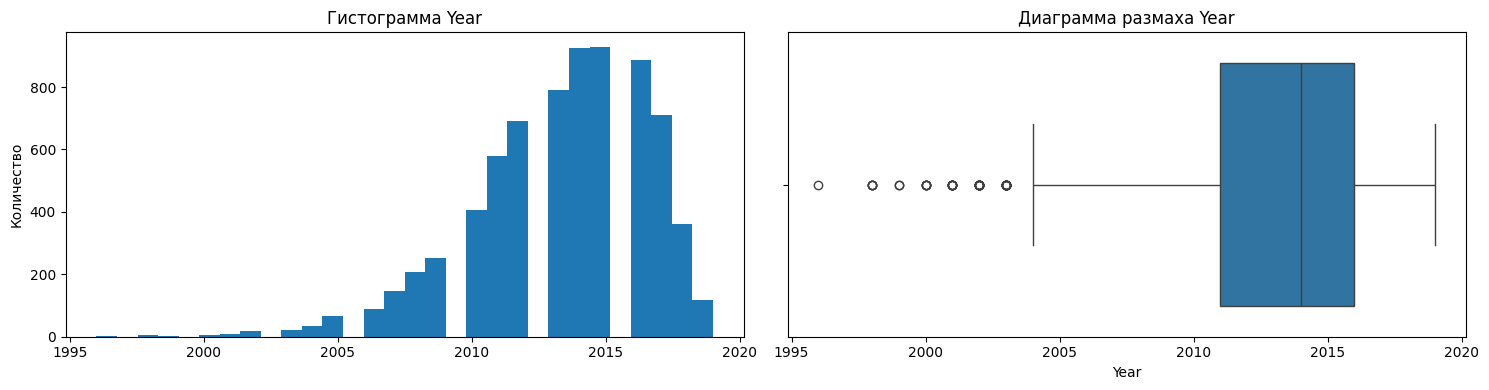


Kilometers_Driven:
Асимметрия: 61.58


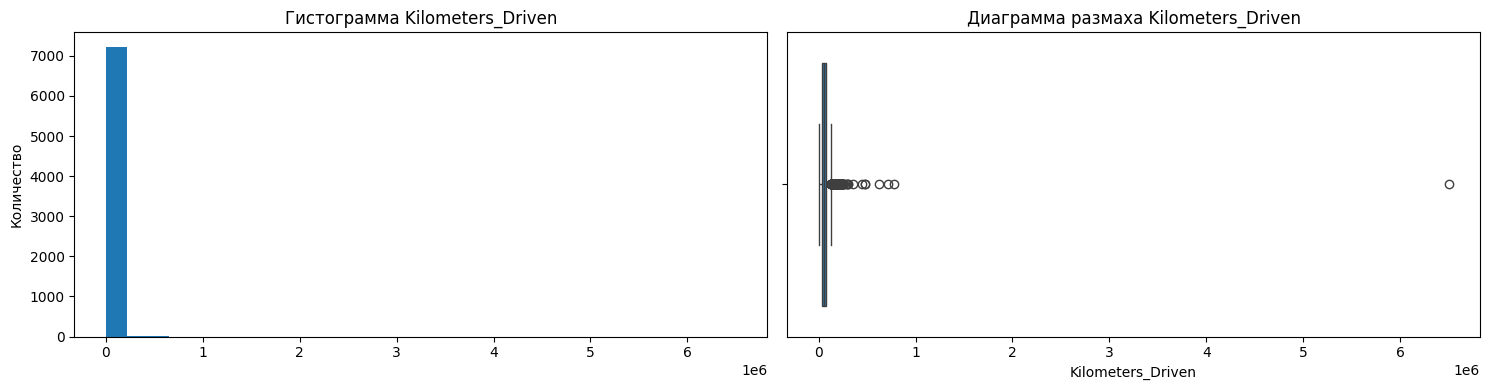


Seats:
Асимметрия: 1.90


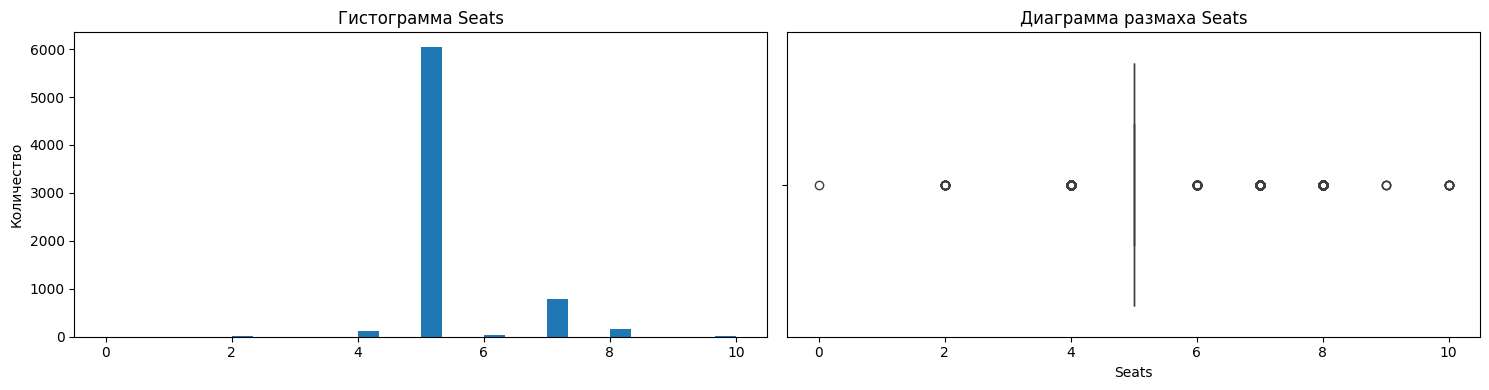


Price:
Асимметрия: 3.34


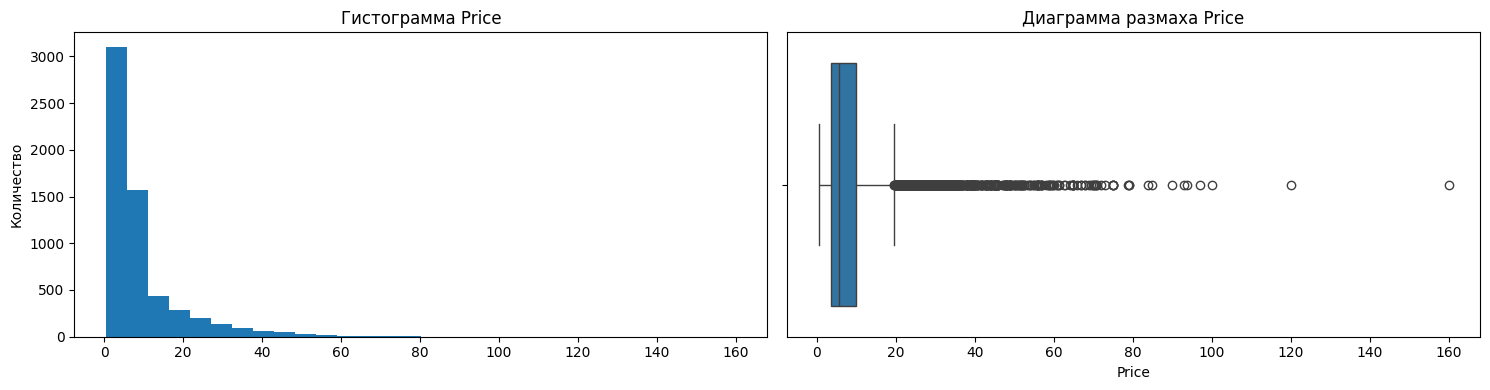


Car_Age:
Асимметрия: 0.84


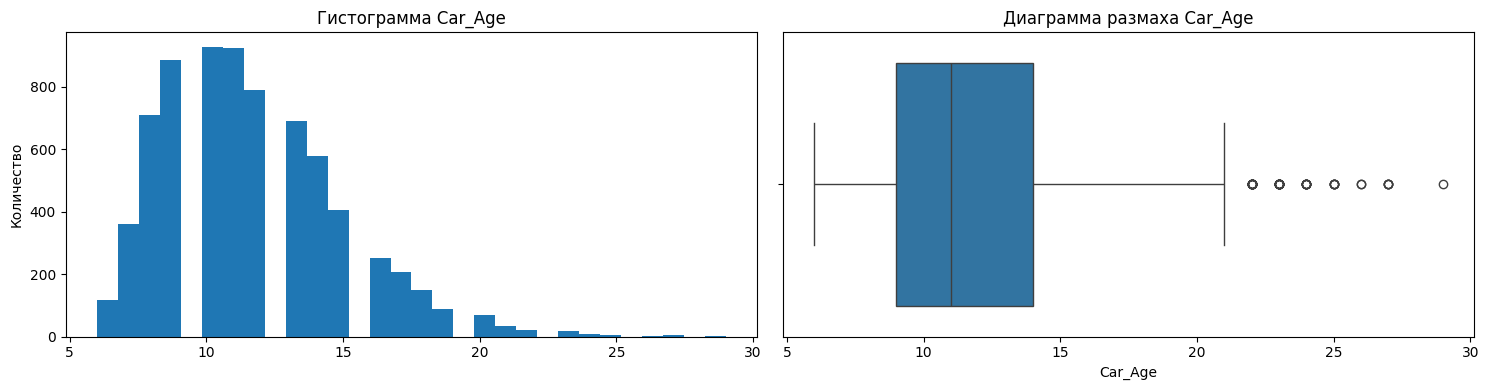

In [20]:
for col in num_cols:
    print(f"\n{col}:")
    skewness = data[col].skew()
    print(f'Асимметрия: {skewness:.2f}')
    
    plt.figure(figsize=(15, 4))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False, bins=30)
    plt.ylabel('Количество')
    plt.title(f'Гистограмма {col}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Диаграмма размаха {col}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# По графикам видно, что числовые переменные распределны очень ассиметрично,
# Сделаем логарифмическое преобразование данных, 
# для того чтобы распределение приблизилось к нормальному
def log_transform(data, col):
    """Функция для логарифмического преобразования данных"""
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname] + 1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    return data

# Применяем логарифмирование к сильно скошенным переменным
data = log_transform(data, ['Kilometers_Driven', 'Price'])

print("Данные после логарифмического преобразования:")
print(data[['Kilometers_Driven', 'Kilometers_Driven_log', 'Price', 'Price_log']].head())

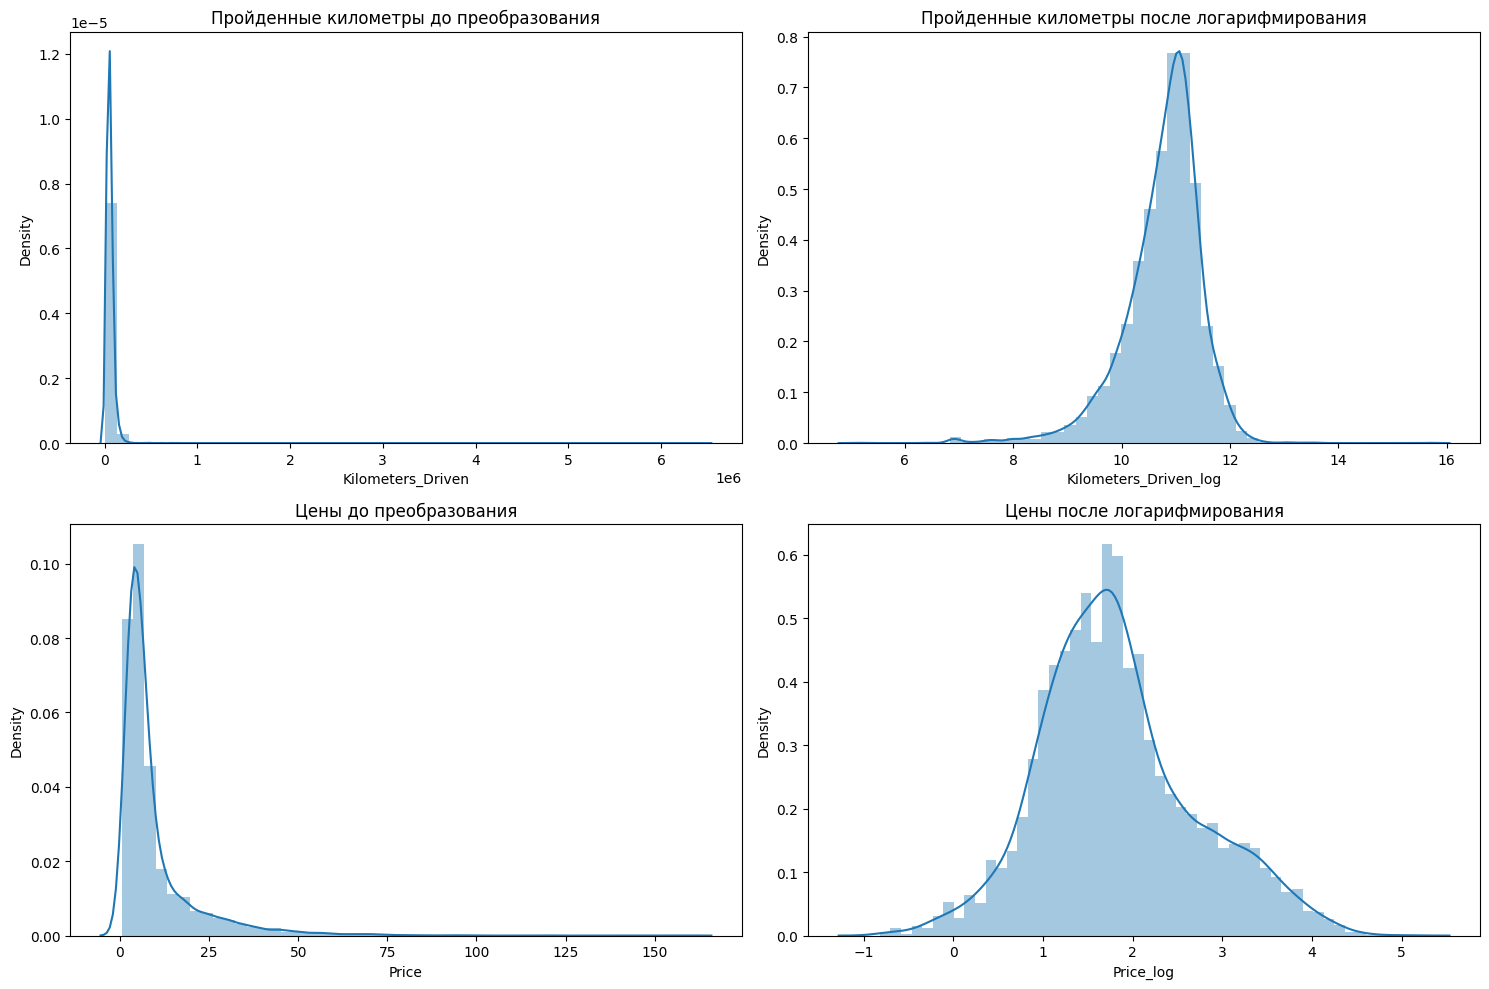

In [23]:
# Визуализация эффекта преобразования
plt.figure(figsize=(15, 10))

# Пройденные километры
plt.subplot(2, 2, 1)
sns.distplot(data["Kilometers_Driven"])
plt.title("Пройденные километры до преобразования")

plt.subplot(2, 2, 2)
sns.distplot(data["Kilometers_Driven_log"])
plt.title("Пройденные километры после логарифмирования")

# Цены
plt.subplot(2, 2, 3)
sns.distplot(data["Price"])
plt.title("Цены до преобразования")

plt.subplot(2, 2, 4)
sns.distplot(data["Price_log"])
plt.title("Цены после логарифмирования")

plt.tight_layout()
plt.show()

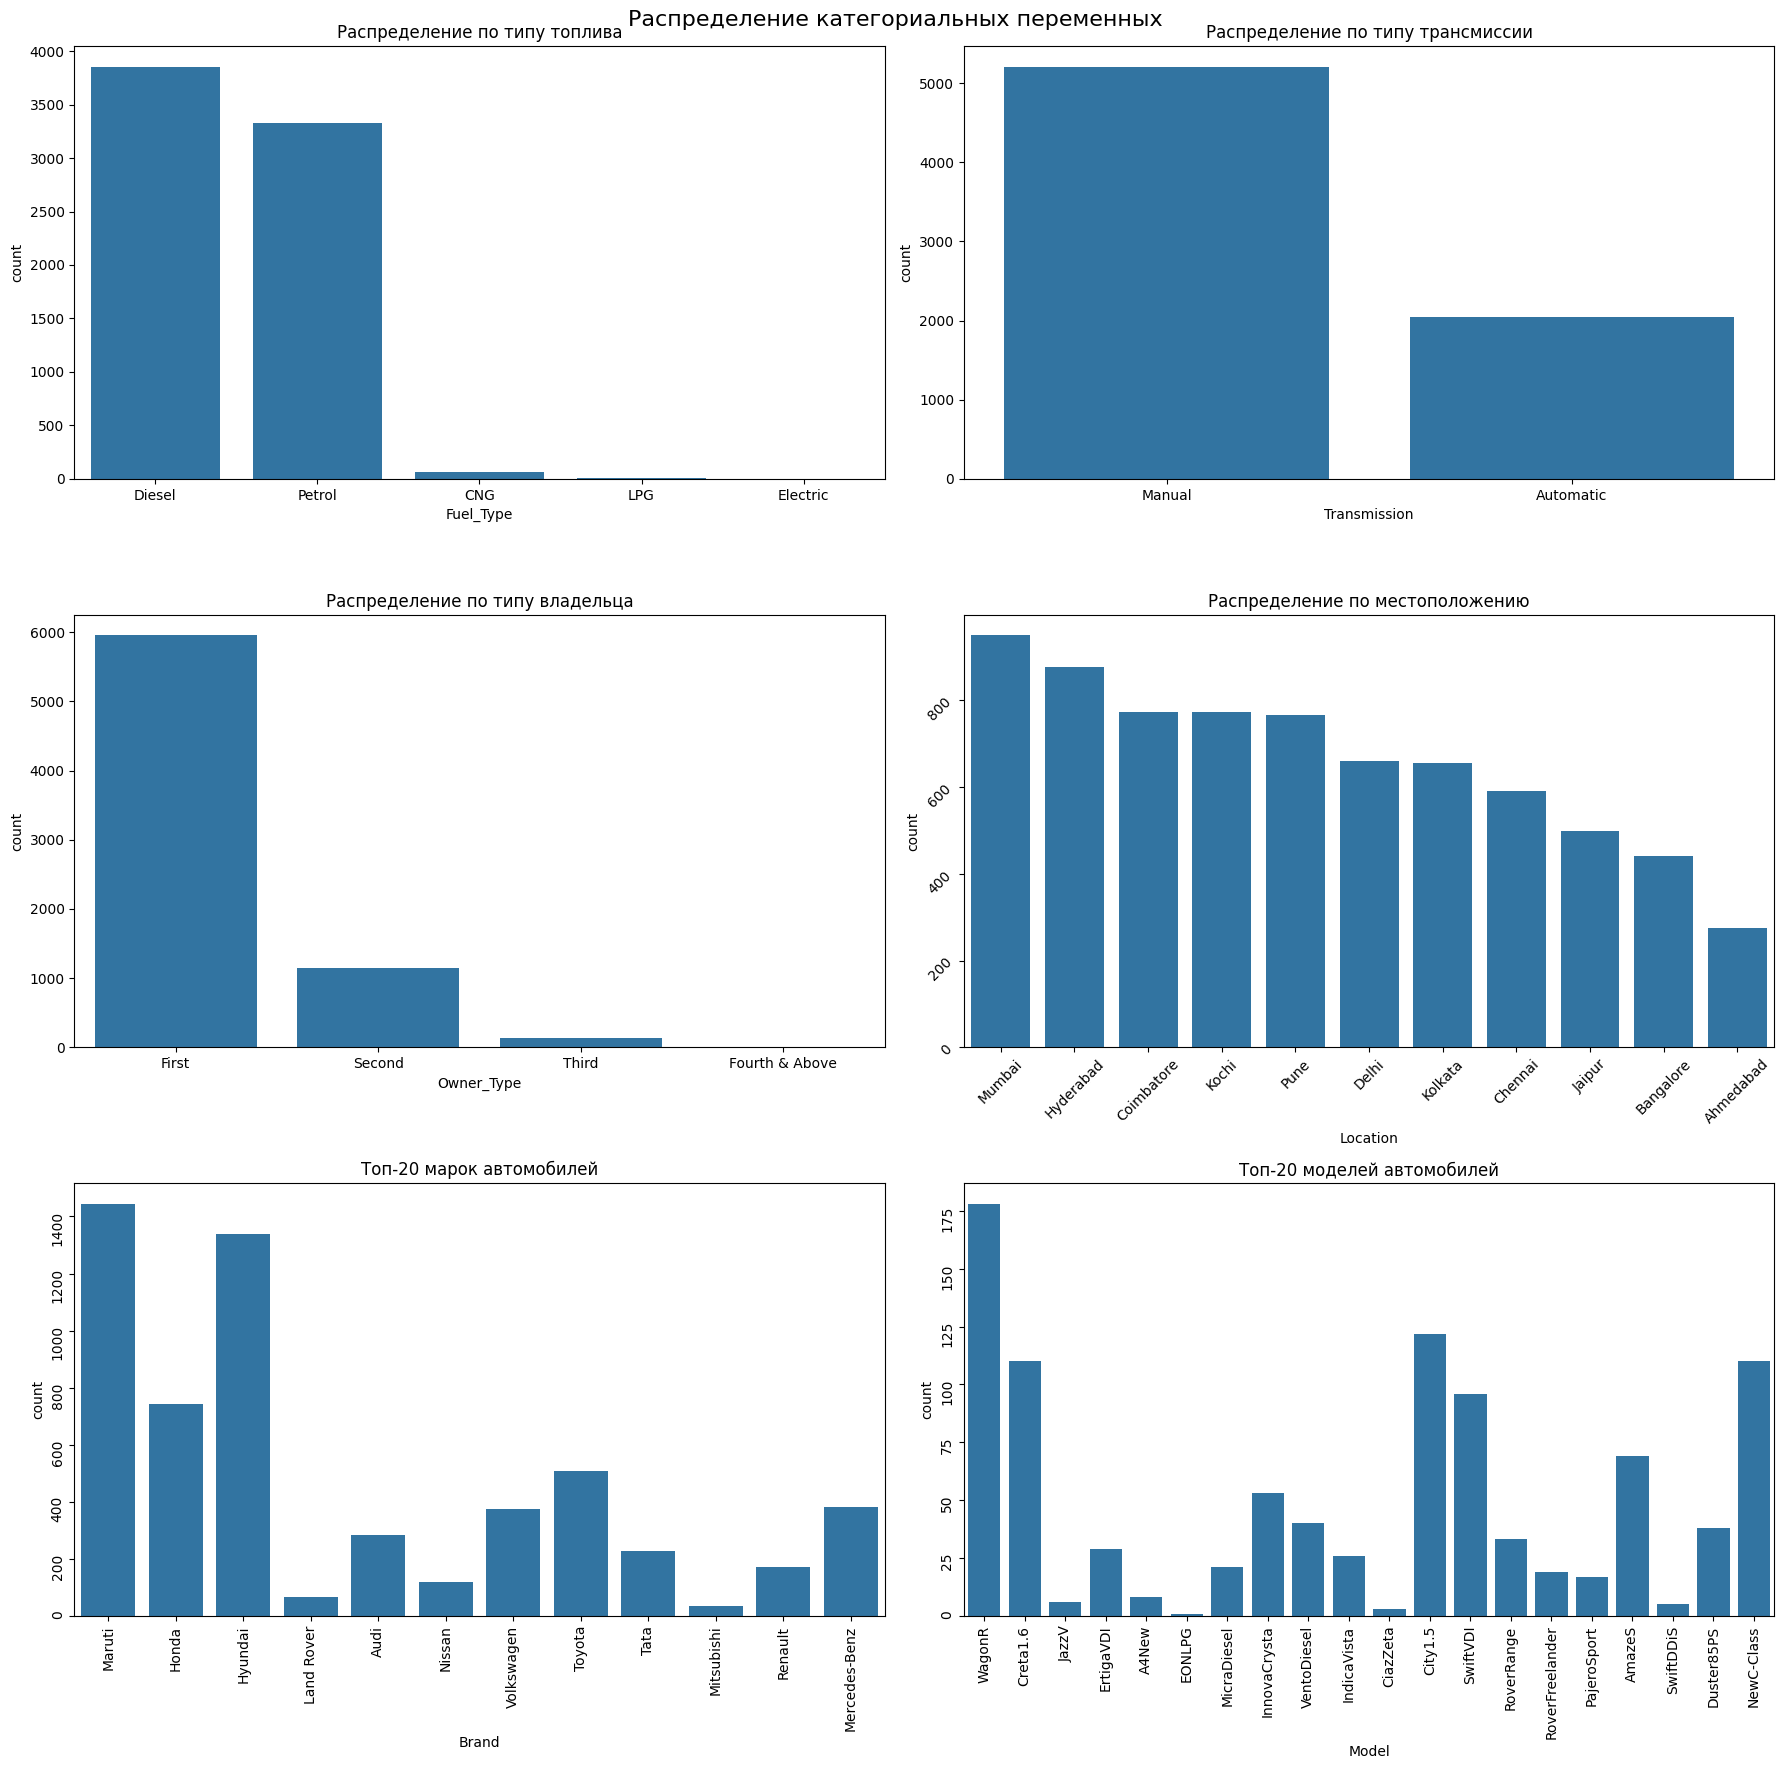

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Распределение категориальных переменных', fontsize=16)

# Тип топлива
sns.countplot(ax=axes[0, 0], x='Fuel_Type', data=data, 
              order=data['Fuel_Type'].value_counts().index)
axes[0, 0].set_title('Распределение по типу топлива')

# Трансмиссия
sns.countplot(ax=axes[0, 1], x='Transmission', data=data,
              order=data['Transmission'].value_counts().index)
axes[0, 1].set_title('Распределение по типу трансмиссии')

# Тип владельца
sns.countplot(ax=axes[1, 0], x='Owner_Type', data=data,
              order=data['Owner_Type'].value_counts().index)
axes[1, 0].set_title('Распределение по типу владельца')

# Местоположение
sns.countplot(ax=axes[1, 1], x='Location', data=data,
              order=data['Location'].value_counts().index)
axes[1, 1].set_title('Распределение по местоположению')
axes[1, 1].tick_params(labelrotation=45)

# Топ-20 марок
sns.countplot(ax=axes[2, 0], x='Brand', data=data,
              order=data['Brand'].head(20).value_counts().index)
axes[2, 0].set_title('Топ-20 марок автомобилей')
axes[2, 0].tick_params(labelrotation=90)

# Топ-20 моделей
sns.countplot(ax=axes[2, 1], x='Model', data=data,
              order=data['Model'].head(20).value_counts().index)
axes[2, 1].set_title('Топ-20 моделей автомобилей')
axes[2, 1].tick_params(labelrotation=90)

plt.tight_layout()
plt.show()